In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Importing datasets

In [4]:
cities = pd.read_csv("cities.csv")
product = pd.read_csv("product.csv")
sales = pd.read_csv("sales.csv", index_col=0, delimiter = ",")

In [5]:
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [6]:
sales['revenue'] = sales['revenue'].fillna(0)

In [7]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped = sales.set_index('date').groupby('store_id')["sales","revenue"].resample("W").sum()
sales_grouped = sales_grouped.reset_index()

In [8]:
sales_grouped.isna().sum()

store_id    0
date        0
sales       0
revenue     0
dtype: int64

In [9]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [10]:
sales['date'] = pd.to_datetime(sales['date'])
sales_grouped_v2 = sales_grouped.set_index("date")

In [11]:
# Get unique store IDs
store_ids = sales['store_id'].unique()
store_ids

array(['S0002', 'S0003', 'S0005', 'S0007', 'S0010', 'S0012', 'S0014',
       'S0015', 'S0016', 'S0020', 'S0022', 'S0023', 'S0026', 'S0030',
       'S0032', 'S0036', 'S0038', 'S0039', 'S0040', 'S0041', 'S0045',
       'S0046', 'S0050', 'S0052', 'S0055', 'S0056', 'S0058', 'S0059',
       'S0061', 'S0062', 'S0067', 'S0068', 'S0071', 'S0072', 'S0073',
       'S0076', 'S0077', 'S0080', 'S0083', 'S0085', 'S0086', 'S0088',
       'S0089', 'S0091', 'S0092', 'S0094', 'S0095', 'S0097', 'S0099',
       'S0102', 'S0104', 'S0107', 'S0108', 'S0109', 'S0120', 'S0122',
       'S0126', 'S0131', 'S0132', 'S0136', 'S0141', 'S0142', 'S0143'],
      dtype=object)

# Seasonal decomposition

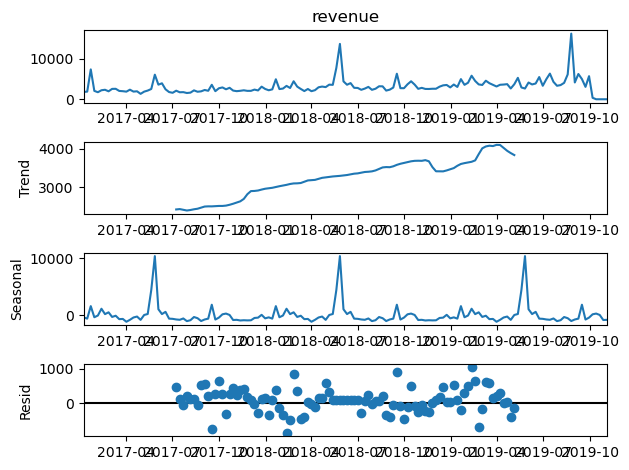

Not enough observations for Store ID: S0005
Not enough observations for Store ID: S0007
Not enough observations for Store ID: S0036
Not enough observations for Store ID: S0046
Not enough observations for Store ID: S0061
Not enough observations for Store ID: S0071
Not enough observations for Store ID: S0076
Not enough observations for Store ID: S0092
Not enough observations for Store ID: S0109


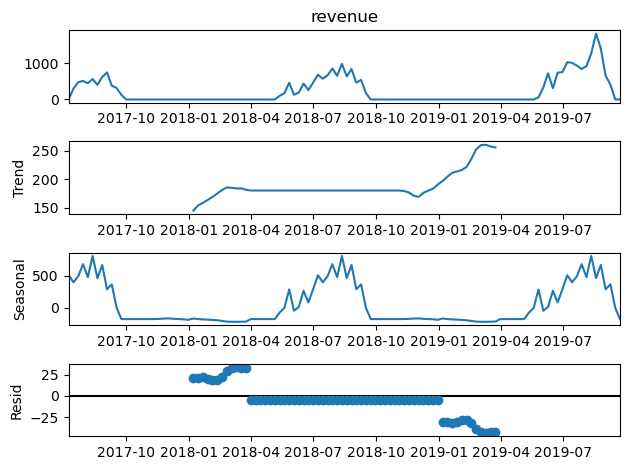

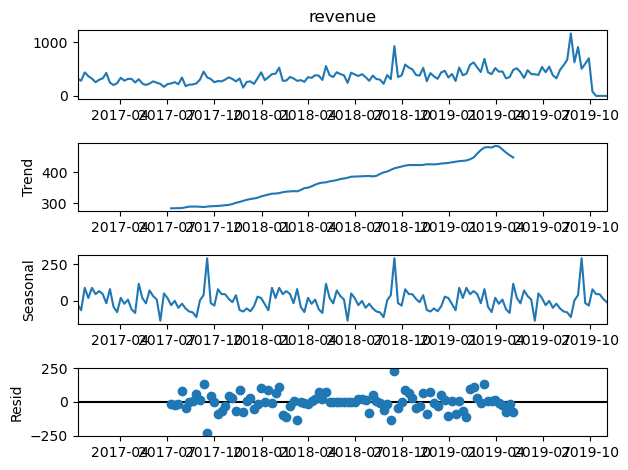

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# List of store IDs to plot
stores_to_plot = ['S0002', 'S0136', 'S0143']

# Perform seasonal decomposition for each store ID
for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]

    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        continue

    # Perform seasonal decomposition for the specific store ID
    decomposition = seasonal_decompose(df_store['revenue'], model='additive', period=52)

    # Check if the current store ID is in the list of stores to plot
    if store_id in stores_to_plot:
        # Plot the decomposition for the selected store ID
        fig = decomposition.plot()
        #plt.title(f"Seasonal Decomposition - Store ID: {store_id}")
        plt.show()

# Revenue plot per store

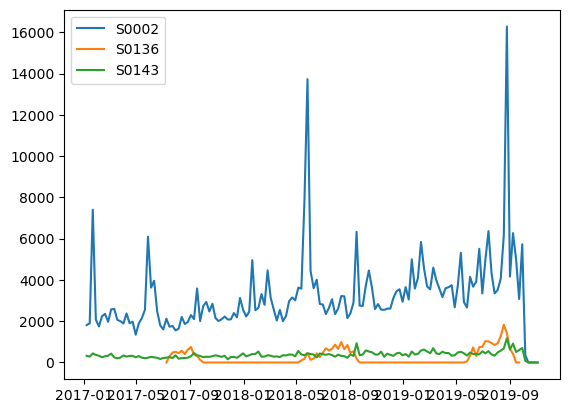

In [13]:
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0002"].loc[:,"revenue"], label = "S0002")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0136"].loc[:,"revenue"], label = "S0136")
plt.plot(sales_grouped_v2[sales_grouped_v2["store_id"] == "S0143"].loc[:,"revenue"], label = "S0143")
plt.legend(loc="upper left")
plt.show()

# Subset dataset into train and test set

Let's use last 4 weeks as test set

In [14]:
train = sales_grouped_v2['2017-01-08' :'2019-09-08']
test = sales_grouped_v2['2019-09-08' :'2019-09-29']
test

,store_id,sales,revenue
date,,,
2019-09-08,S0002,598.00,6267.91
2019-09-15,S0002,656.00,5007.57
2019-09-22,S0002,525.00,3074.56
2019-09-29,S0002,656.16,5728.25
2019-09-08,S0003,227.00,1302.61
...,...,...,...
2019-09-29,S0142,302.00,1866.41
2019-09-08,S0143,104.00,915.27
2019-09-15,S0143,63.00,507.08


# Train vs Test

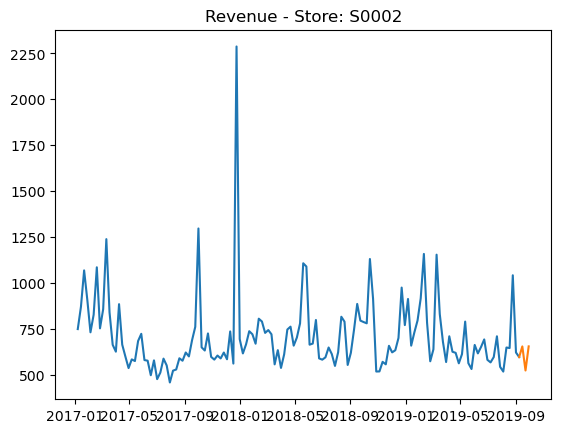

In [15]:
plt.plot(train[train["store_id"] == "S0002"].loc[:,"sales"], label = "Train")
plt.plot(test[test["store_id"] == "S0002"].loc[:,"sales"],label = "Test")
plt.title("Revenue - Store: S0002")
plt.show()

# First model - Simple average

In [16]:
# Simple average
avg = test.copy().reset_index()
mean_revenue = train.groupby(["store_id"])["revenue"].mean().reset_index()

for i in range(len(avg)):
    for j in range(len(mean_revenue)):
        if avg.loc[i, "store_id"] == mean_revenue.loc[j, "store_id"]:
            avg.loc[i, 'avg_revenue'] = mean_revenue.loc[j, "revenue"]

avg = avg.set_index("date")

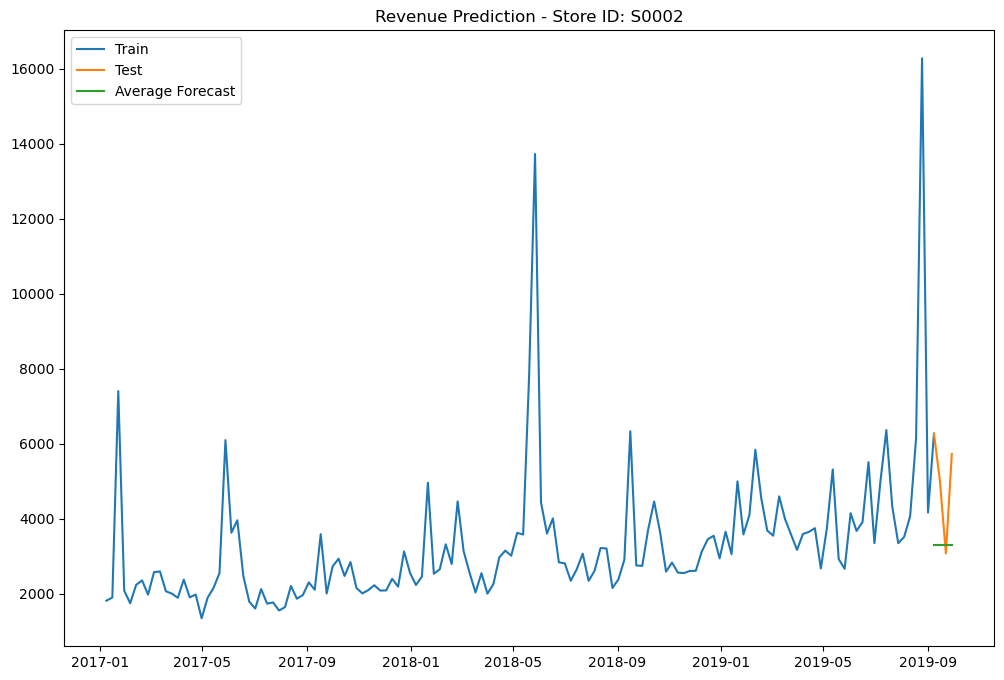

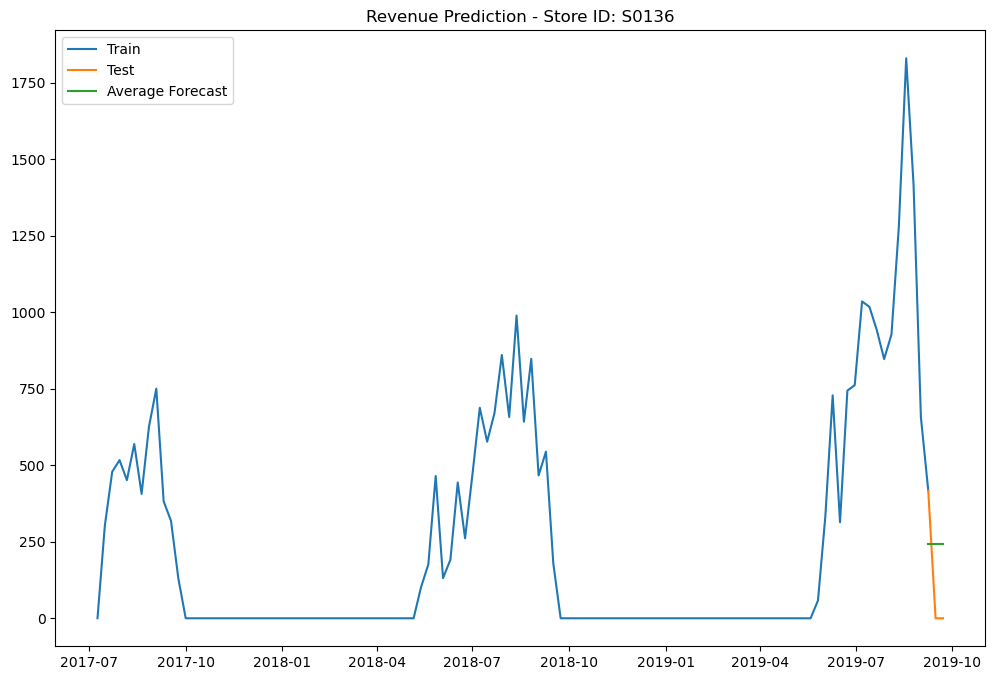

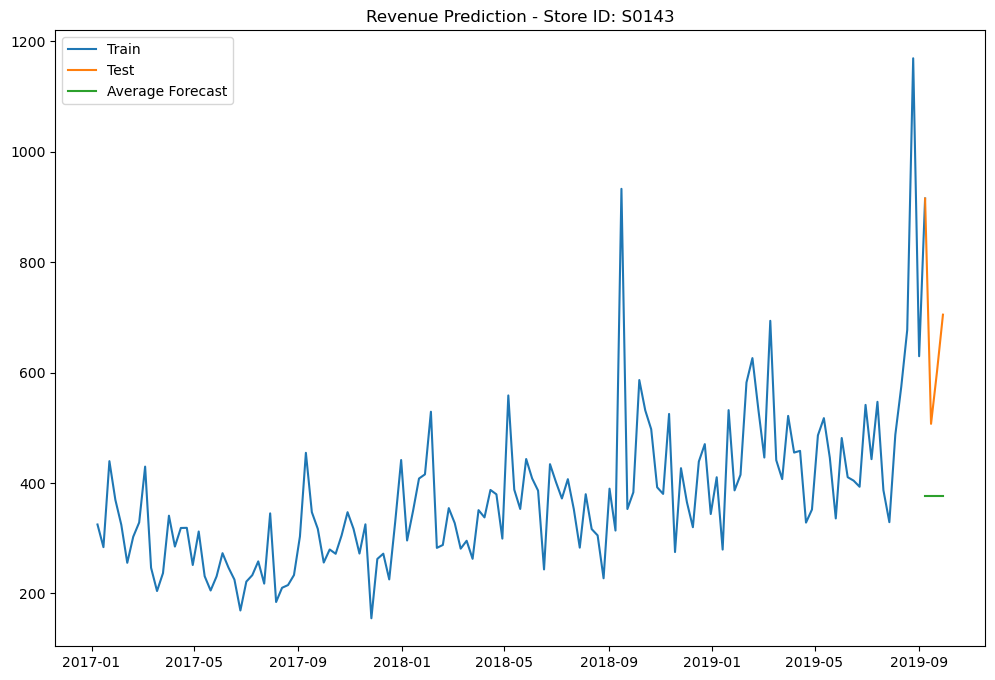

In [17]:
store_ids_plot = ["S0002", "S0136", "S0143"]

for store_id in store_ids_plot:
    plt.figure(figsize=(12,8))
    plt.plot(train[train["store_id"] == store_id].loc[:,"revenue"], label='Train')
    plt.plot(test[test["store_id"] == store_id].loc[:,"revenue"], label='Test')
    plt.plot(avg[avg["store_id"] == store_id].loc[:,"avg_revenue"], label='Average Forecast')
    plt.title(f"Revenue Prediction - Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

# Model evalution

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_revenue_avg = sqrt(mean_squared_error(test["revenue"], avg.avg_revenue))
rmse_revenue_avg

1241.6886495914234

# Second model - Arima

In [19]:
%pip install pmdarima
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

In [20]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_grouped["revenue"])

(0.01, False)

- Null Hypothesis: The data is not stationary
- Alternative Hypothesis: The data is stationary

p-value <= significance level (reject the null hypothesis). Likely data is stationary

In [21]:
# Apply auto_arima for each store ID without seasonal component 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_grouped_v2[sales_grouped_v2['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       start_p=1, 
                       start_q=1,
                       test = "adf", # use adftest to find optimal "d"
                       max_p=5, #maximum p
                       max_q=5, #maximum q
                       m=1, #frequency of series (if m=1, seasonal is set to False automatically)
                       d=None, #let model determine "d"
                       seasonal=False, # no seasonality for standard ARIMA
                       start_P=0, 
                       D=None, #The order of the seasonal differencing 
                       trace=True, #logs
                       error_action='ignore', #doesn't show errors
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_revenue"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arima_revenue"] = prediction["predicted_revenue"]

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2645.651, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2857.034, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2672.416, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2765.615, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2641.499, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2657.169, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2641.943, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2646.274, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2645.833, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2650.288, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2644.614, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2636.892, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2635.341, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2642.725, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept

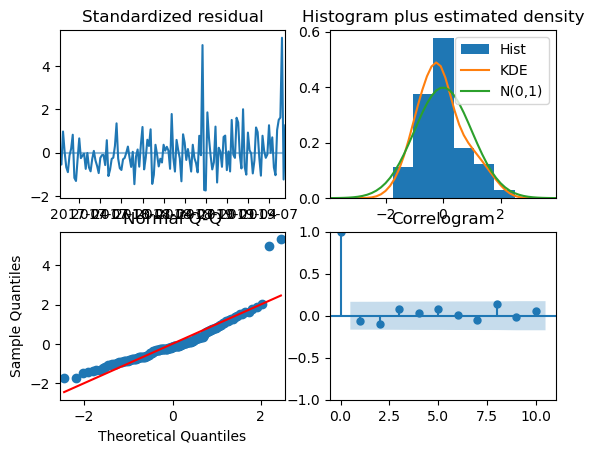

In [22]:
model.plot_diagnostics();

In [23]:
prediction_arima = prediction.copy()
df_test_arima = df_test.copy()
df_test_arima

,store_id,sales,revenue,arima_revenue
2019-09-08,S0002,598.00,6267.91,4416.007678
2019-09-15,S0002,656.00,5007.57,4012.659636
2019-09-22,S0002,525.00,3074.56,3670.729063
2019-09-29,S0002,656.16,5728.25,3509.175590
2019-09-08,S0003,227.00,1302.61,2291.120259
...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1377.595301
2019-09-08,S0143,104.00,915.27,664.531859
2019-09-15,S0143,63.00,507.08,685.709388
2019-09-22,S0143,89.00,601.63,597.497453


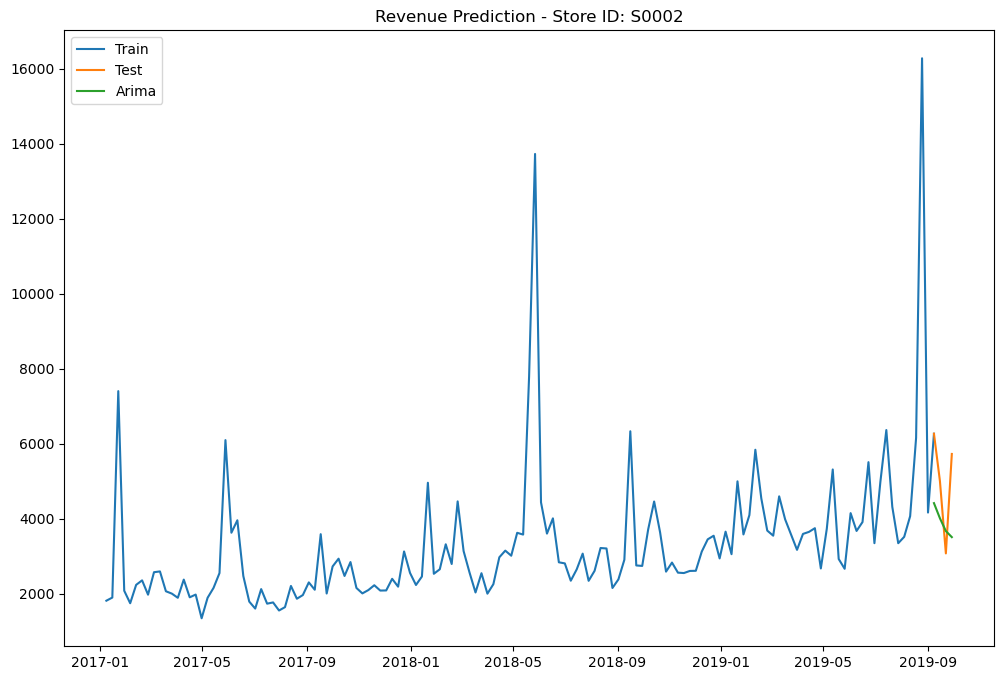

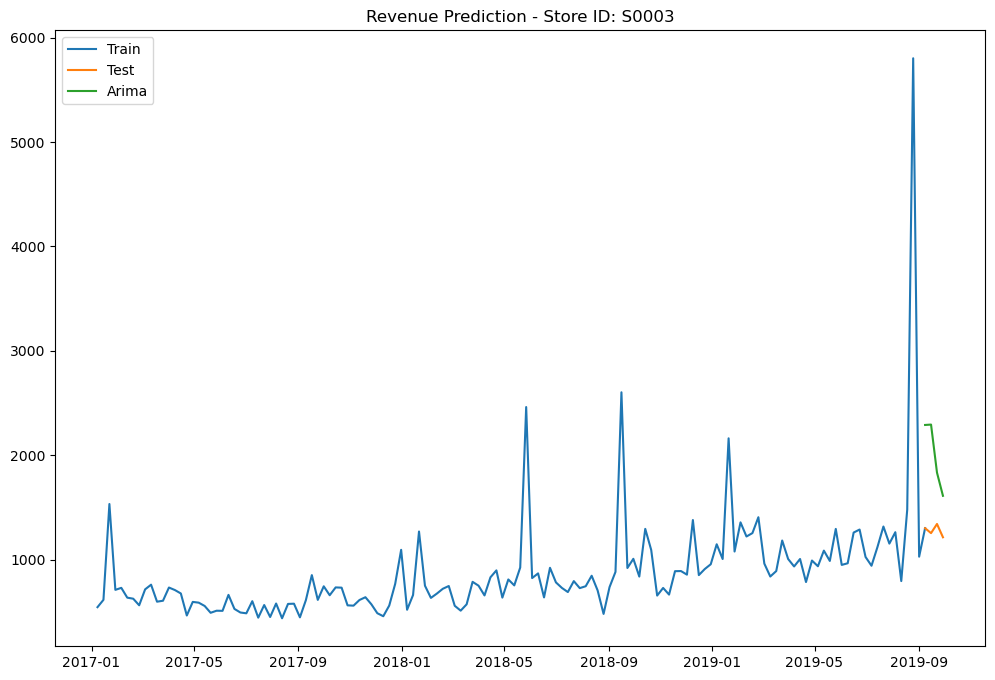

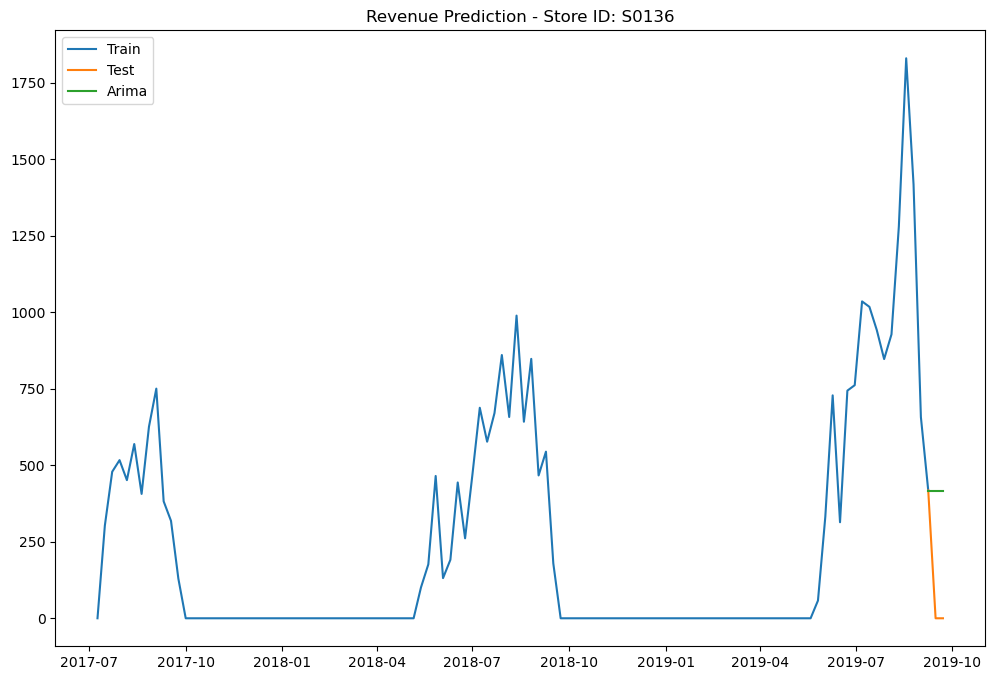

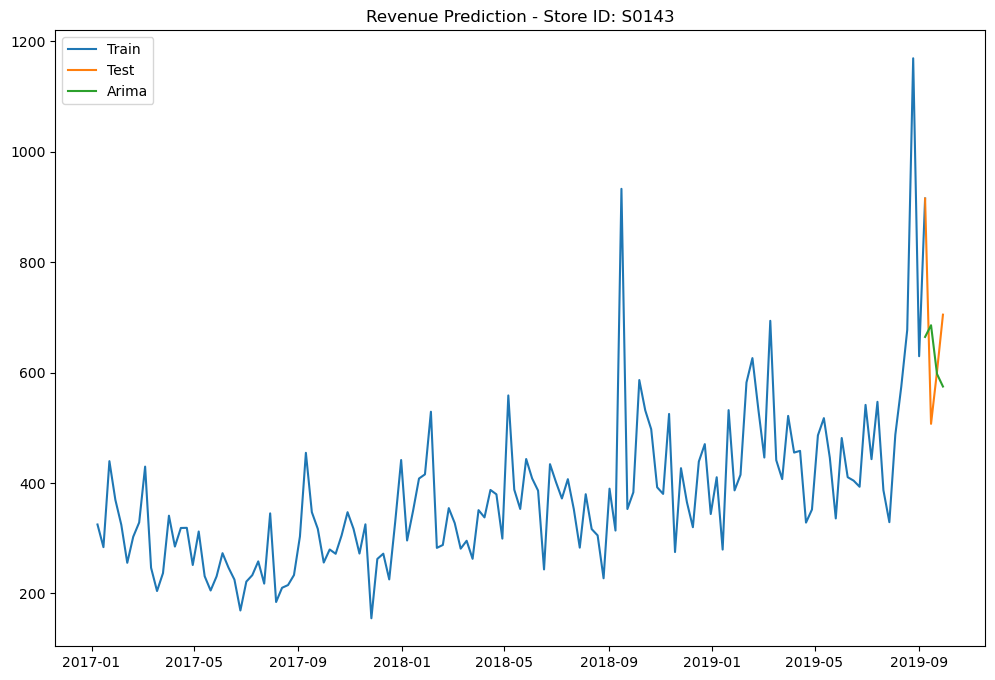

In [24]:
store_ids_plot = ["S0002", "S0003", "S0136", "S0143"]

for store_id in store_ids_plot:
    plt.figure(figsize=(12,8))
    plt.plot(df_train[df_train["store_id"] == store_id].loc[:,"revenue"], label='Train')
    plt.plot(df_test_arima[df_test_arima["store_id"] == store_id].loc[:,"revenue"], label='Test')
    plt.plot(df_test_arima[df_test_arima["store_id"] == store_id].loc[:,"arima_revenue"], label='Arima')
    #plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Revenue Prediction - Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [25]:
rmse_revenue_arima = sqrt(mean_squared_error(df_test_arima["arima_revenue"], df_test["revenue"]))
rmse_revenue_arima

1220.4592486634892

# Now, let's add exogenous variables (Arimax)

1) Month number 
2) Holidays
3) Promotions

In [26]:
sales['promo_discount_2'] = sales['promo_discount_2'].fillna(0)
sales['date'] = pd.to_datetime(sales['date'])
sales

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,0.0,NaN
2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,0.0,NaN
3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,0.0,NaN
4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,0.0,NaN
5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886054,S0143,P0676,2019-10-31,NaN,0.00,NaN,19.90,PR03,verylow,PR03,NaN,0.0,NaN
8886055,S0143,P0680,2019-10-31,NaN,0.00,NaN,139.90,PR14,NaN,PR03,NaN,0.0,NaN
8886056,S0143,P0694,2019-10-31,NaN,0.00,NaN,7.50,PR14,NaN,PR03,NaN,0.0,NaN
8886057,S0143,P0718,2019-10-31,NaN,0.00,NaN,23.75,PR14,NaN,PR03,NaN,0.0,NaN


In [27]:
%pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Let's identify whether a certain date is a holiday in Turkey and create a boolean variable with it
import holidays

turkish_holidays = holidays.Turkey()

# Create a new column 'is_holiday' and check if the date is a holiday
sales['is_holiday'] = sales['date'].apply(lambda x: int(x in turkish_holidays))
sales[sales["is_holiday"] == 1]

,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,is_holiday
20472,S0002,P0001,2017-04-23,0.0,0.00,1.0,6.50,PR14,NaN,PR03,NaN,0.0,NaN,1
20473,S0002,P0005,2017-04-23,0.0,0.00,10.0,33.90,PR14,NaN,PR03,NaN,0.0,NaN,1
20474,S0002,P0011,2017-04-23,0.0,0.00,4.0,36.00,PR14,NaN,PR03,NaN,0.0,NaN,1
20475,S0002,P0015,2017-04-23,2.0,4.17,5.0,2.85,PR10,low,PR03,NaN,0.0,NaN,1
20476,S0002,P0017,2017-04-23,1.0,1.10,53.0,1.49,PR06,low,PR03,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885919,S0143,P0676,2019-10-29,NaN,0.00,NaN,19.90,PR03,verylow,PR03,NaN,0.0,NaN,1
8885920,S0143,P0680,2019-10-29,NaN,0.00,NaN,139.90,PR14,NaN,PR03,NaN,0.0,NaN,1
8885921,S0143,P0694,2019-10-29,NaN,0.00,NaN,7.50,PR14,NaN,PR03,NaN,0.0,NaN,1
8885922,S0143,P0718,2019-10-29,NaN,0.00,NaN,23.75,PR14,NaN,PR03,NaN,0.0,NaN,1


# Now let's group data by store_id and per week

In [29]:
sales_promo = sales.set_index('date').groupby('store_id')["sales","revenue", "promo_discount_2", "is_holiday"].resample("W").sum()
sales_promo

sales  revenue  promo_discount_2  is_holiday
store_id date                                                       
S0002    2017-01-08   750.232  1813.24               0.0           0
         2017-01-15   871.530  1896.91               0.0           0
         2017-01-22  1069.555  7404.16               0.0           0
         2017-01-29   910.255  2078.39               0.0           0
         2017-02-05   732.754  1745.47               0.0           0
...                       ...      ...               ...         ...
S0143    2019-10-06    18.000    80.82             792.0           0
         2019-10-13     0.000     0.00             264.0           0
         2019-10-20     0.000     0.00               0.0           0
         2019-10-27     0.000     0.00               0.0           0
         2019-11-03     0.000     0.00               0.0          68

[8610 rows x 4 columns]

In [30]:
# Replace promo_discount_2 values higher than 0 with 1: if there is at least 1 promotion per week and per store, the value is 1 else 0 
sales_promo['promo_discount_2'] = sales_promo['promo_discount_2'].where(sales_promo['promo_discount_2'] <= 0, 1)
sales_promo['is_holiday'] = sales_promo['is_holiday'].where(sales_promo['is_holiday'] <= 0, 1)
sales_promo

sales  revenue  promo_discount_2  is_holiday
store_id date                                                       
S0002    2017-01-08   750.232  1813.24               0.0           0
         2017-01-15   871.530  1896.91               0.0           0
         2017-01-22  1069.555  7404.16               0.0           0
         2017-01-29   910.255  2078.39               0.0           0
         2017-02-05   732.754  1745.47               0.0           0
...                       ...      ...               ...         ...
S0143    2019-10-06    18.000    80.82               1.0           0
         2019-10-13     0.000     0.00               1.0           0
         2019-10-20     0.000     0.00               0.0           0
         2019-10-27     0.000     0.00               0.0           0
         2019-11-03     0.000     0.00               0.0           1

[8610 rows x 4 columns]

In [31]:
sales_promo = sales_promo.reset_index()
sales_promo['month']=sales_promo["date"].dt.month # add a column with month number
sales_promo

,store_id,date,sales,revenue,promo_discount_2,is_holiday,month
0,S0002,2017-01-08,750.232,1813.24,0.0,0,1
1,S0002,2017-01-15,871.530,1896.91,0.0,0,1
2,S0002,2017-01-22,1069.555,7404.16,0.0,0,1
3,S0002,2017-01-29,910.255,2078.39,0.0,0,1
4,S0002,2017-02-05,732.754,1745.47,0.0,0,2
...,...,...,...,...,...,...,...
8605,S0143,2019-10-06,18.000,80.82,1.0,0,10
8606,S0143,2019-10-13,0.000,0.00,1.0,0,10
8607,S0143,2019-10-20,0.000,0.00,0.0,0,10
8608,S0143,2019-10-27,0.000,0.00,0.0,0,10


In [32]:
sales_promo.set_index("date", inplace = True)

In [33]:
sales_promo

,store_id,sales,revenue,promo_discount_2,is_holiday,month
date,,,,,,
2017-01-08,S0002,750.232,1813.24,0.0,0,1
2017-01-15,S0002,871.530,1896.91,0.0,0,1
2017-01-22,S0002,1069.555,7404.16,0.0,0,1
2017-01-29,S0002,910.255,2078.39,0.0,0,1
2017-02-05,S0002,732.754,1745.47,0.0,0,2
...,...,...,...,...,...,...
2019-10-06,S0143,18.000,80.82,1.0,0,10
2019-10-13,S0143,0.000,0.00,1.0,0,10
2019-10-20,S0143,0.000,0.00,0.0,0,10


# Subsetting dataset: 1 month for test

In [34]:
train = sales_promo['2017-01-08' :'2019-09-08']
test = sales_promo['2019-09-08' :'2019-09-29']

In [35]:
test

,store_id,sales,revenue,promo_discount_2,is_holiday,month
date,,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0,9
2019-09-15,S0002,656.00,5007.57,1.0,0,9
2019-09-22,S0002,525.00,3074.56,1.0,0,9
2019-09-29,S0002,656.16,5728.25,1.0,0,9
2019-09-08,S0003,227.00,1302.61,1.0,0,9
...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9
2019-09-08,S0143,104.00,915.27,1.0,0,9
2019-09-15,S0143,63.00,507.08,1.0,0,9


# Third model - Arimax

In [36]:
# Apply auto_arima for each store ID with exogenous variables 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    exog_train_store = sales_promo.loc[df_train_store.index, ['promo_discount_2', 'is_holiday', 'month']]
    exog_test_store = sales_promo.loc[df_test_store.index, ['promo_discount_2', 'is_holiday', 'month']]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)

    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       exogenous=exog_train_store,
                       start_p=1, 
                       start_q=1,
                       test = "adf", # use adftest to find optimal "d"
                       max_p=5, #maximum p
                       max_q=5, #maximum q
                       m=1, #frequency of series (if m=1, seasonal is set to False automatically)
                       d=None, #let model determine "d"
                       seasonal=False, # no seasonality for standard ARIMA
                       start_P=0, 
                       D=None, #The order of the seasonal differencing 
                       trace=True, #logs
                       error_action='ignore', #doesn't show errors
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store), exogenous=exog_test_store), 
                                    columns = ["predicted_revenue"])
    prediction_store["store_id"] = store_id
    prediction_store.index = df_test_store.index
    
    prediction = prediction.append(prediction_store)

df_test["arimax_revenue"] = prediction["predicted_revenue"]

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2645.651, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2857.034, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2672.416, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2765.615, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2641.499, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2657.169, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2641.943, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2646.274, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2645.833, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2650.288, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2644.614, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2636.892, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2635.341, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2642.725, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept

In [37]:
prediction_arimax = prediction.copy()
df_test_arimax = df_test.copy()
df_test_arimax

,store_id,sales,revenue,promo_discount_2,is_holiday,month,arimax_revenue
2019-09-08,S0002,598.00,6267.91,1.0,0,9,4416.007678
2019-09-15,S0002,656.00,5007.57,1.0,0,9,4012.659636
2019-09-22,S0002,525.00,3074.56,1.0,0,9,3670.729063
2019-09-29,S0002,656.16,5728.25,1.0,0,9,3509.175590
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2291.120259
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,1377.595301
2019-09-08,S0143,104.00,915.27,1.0,0,9,664.531859
2019-09-15,S0143,63.00,507.08,1.0,0,9,685.709388
2019-09-22,S0143,89.00,601.63,1.0,0,9,597.497453


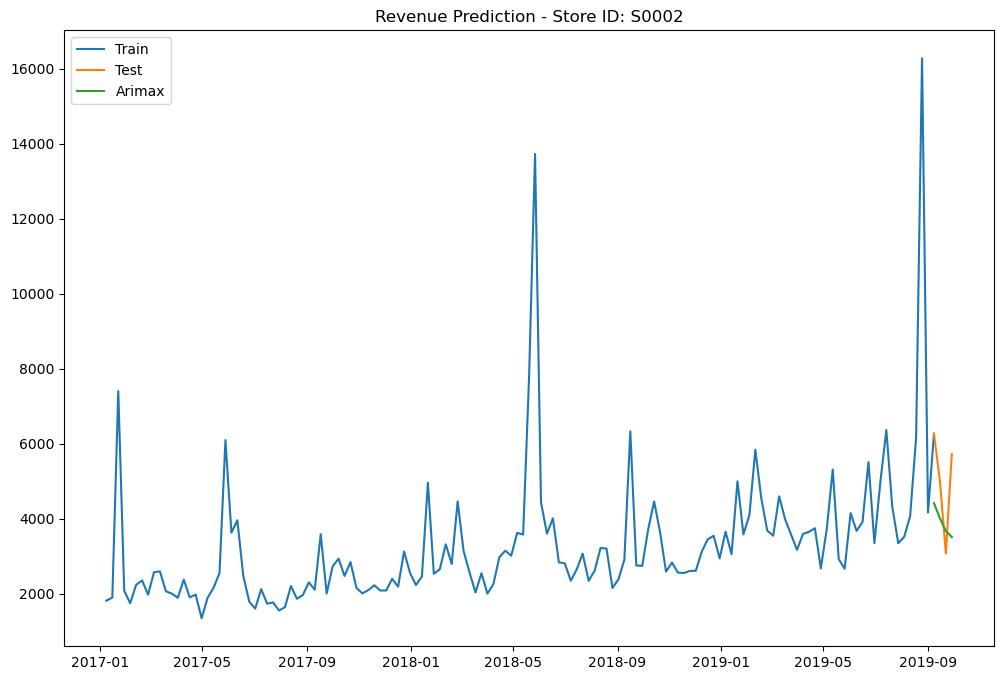

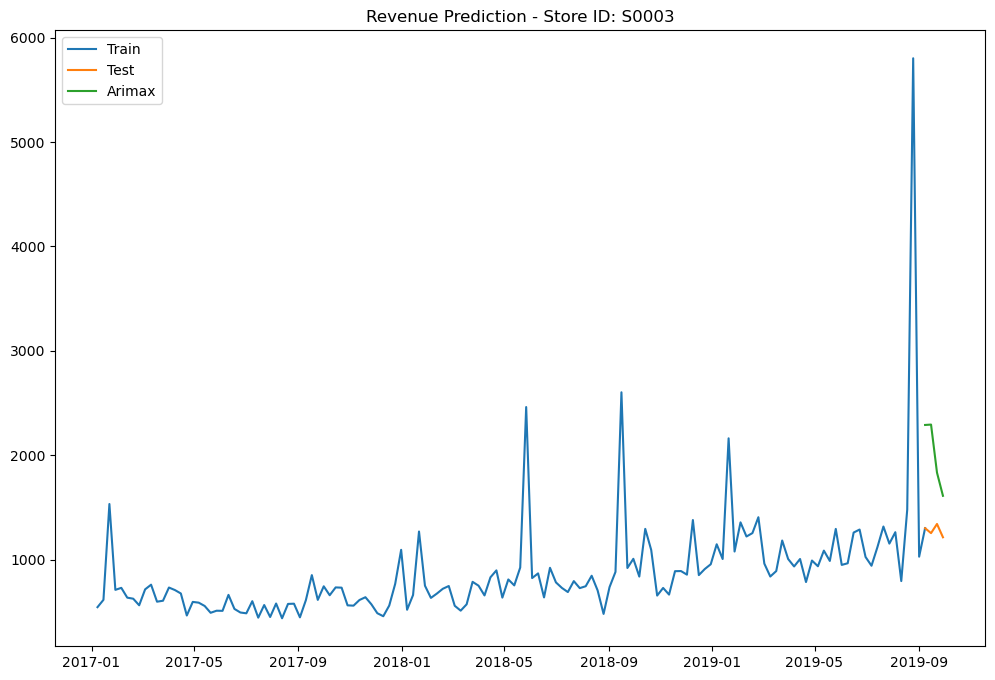

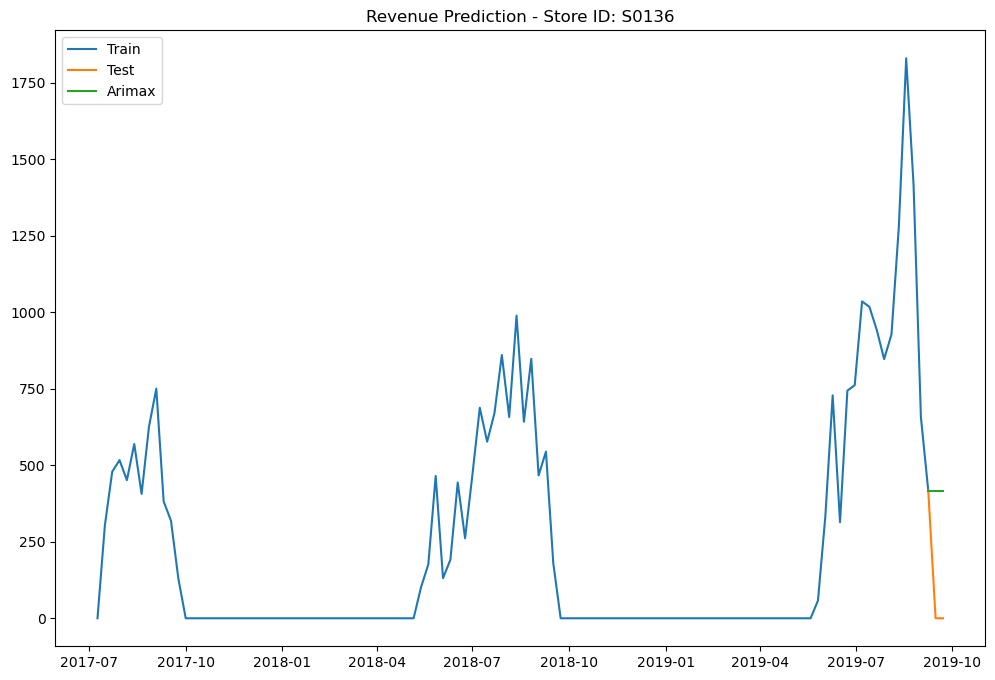

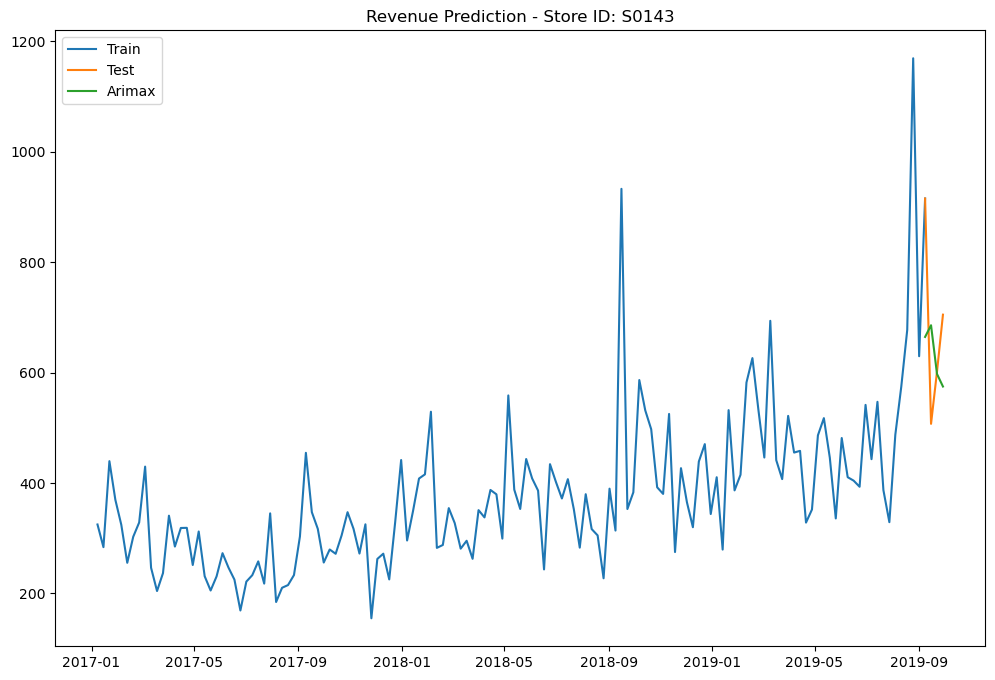

In [38]:
store_ids_plot = ["S0002", "S0003", "S0136", "S0143"]

for store_id in store_ids_plot:
    plt.figure(figsize=(12,8))
    plt.plot(df_train[df_train["store_id"] == store_id].loc[:,"revenue"], label='Train')
    plt.plot(df_test_arimax[df_test_arima["store_id"] == store_id].loc[:,"revenue"], label='Test')
    plt.plot(df_test_arimax[df_test_arima["store_id"] == store_id].loc[:,"arimax_revenue"], label='Arimax')
    #plt.plot(avg[avg["store_id"] == "S0002"].loc[:,"avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Revenue Prediction - Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [39]:
rmse_revenue_arimax = sqrt(mean_squared_error(df_test_arimax["arimax_revenue"], df_test["revenue"]))
rmse_revenue_arimax

1220.4592486634892

It seems RMSE is the same as ARIMA. Exogenous variables doesn't have any impact on the prediction

# Fourth model - SARIMA

In [432]:
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []
models = {}

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       start_p=1, 
                       start_q=1, 
                       test='kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=52,  # is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(
        model.predict(n_periods=len(df_test_store)),
        columns=["predicted_revenue"]
    )
    prediction_store["store_id"] = store_id
    prediction_store = prediction_store.set_index(df_test_store.index)
    
    # Save the model for the specific store
    models[store_id] = model
    
    prediction = prediction.append(prediction_store)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1777.070, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1757.101, Time=0.86 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1783.733, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1764.018, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=9.29 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=4.90 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=11.32 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=1769.581, Time=1.41 sec
 ARIMA(2,0,0)(1,1,0)[52] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=1756.390, Time=1.24 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=1766.000, Time=0.20 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : AIC=1747.662, 

In [436]:
prediction

,predicted_revenue,store_id
2019-09-08,6389.588606,S0002
2019-09-15,4839.284421,S0002
2019-09-22,5133.821161,S0002
2019-09-29,5238.150516,S0002
2019-09-08,2384.743350,S0003
...,...,...
2019-09-29,2037.519292,S0142
2019-09-08,955.522650,S0143
2019-09-15,632.808537,S0143
2019-09-22,547.235761,S0143


In [1]:
models

NameError: name 'models' is not defined

In [437]:
prediction_sarima = prediction.copy()
df_test_sarima = df_test[~df_test['store_id'].isin(insufficient_data_stores)]
df_test_sarima["Sarima"] = prediction_sarima["predicted_revenue"].values
df_test_sarima

,store_id,sales,revenue,promo_discount_2,is_holiday,month,Sarima
2019-09-08,S0002,598.00,6267.91,1.0,0,9,6389.588606
2019-09-15,S0002,656.00,5007.57,1.0,0,9,4839.284421
2019-09-22,S0002,525.00,3074.56,1.0,0,9,5133.821161
2019-09-29,S0002,656.16,5728.25,1.0,0,9,5238.150516
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2384.743350
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,2037.519292
2019-09-08,S0143,104.00,915.27,1.0,0,9,955.522650
2019-09-15,S0143,63.00,507.08,1.0,0,9,632.808537
2019-09-22,S0143,89.00,601.63,1.0,0,9,547.235761


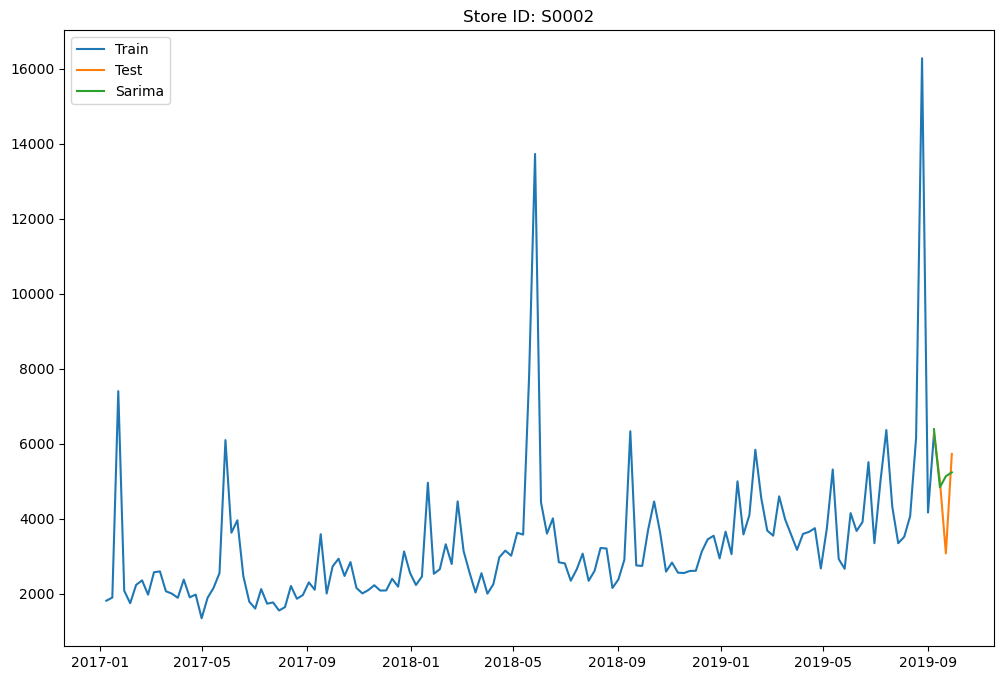

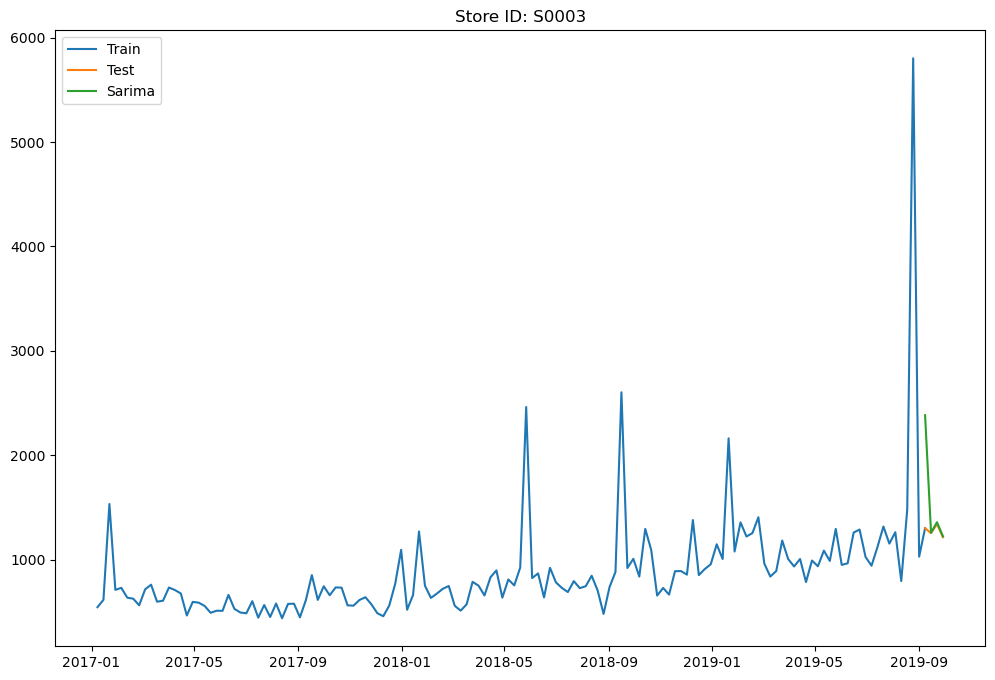

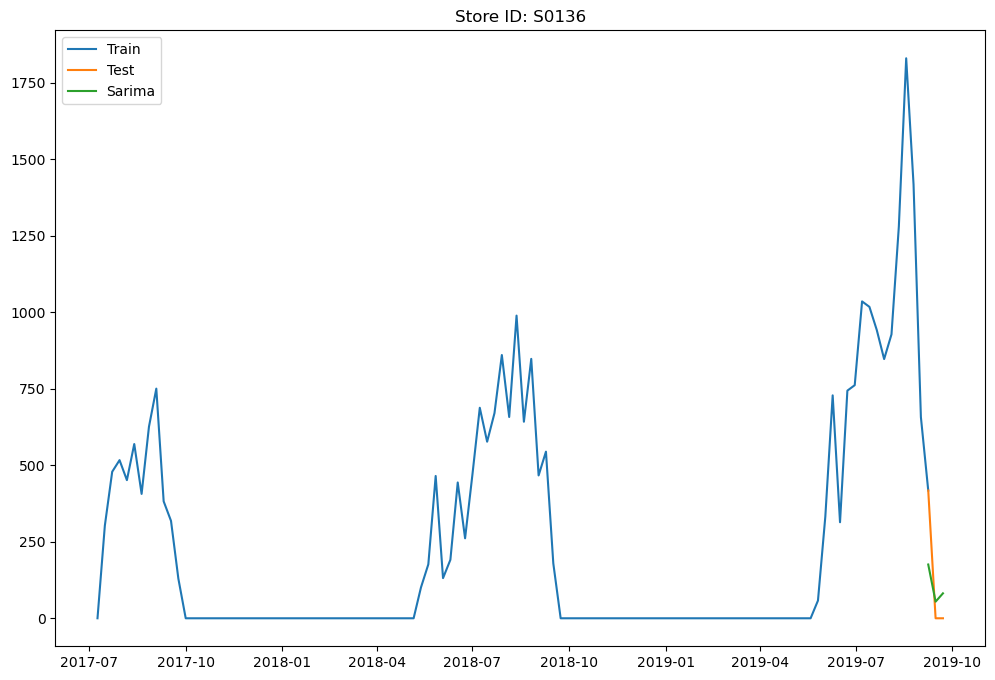

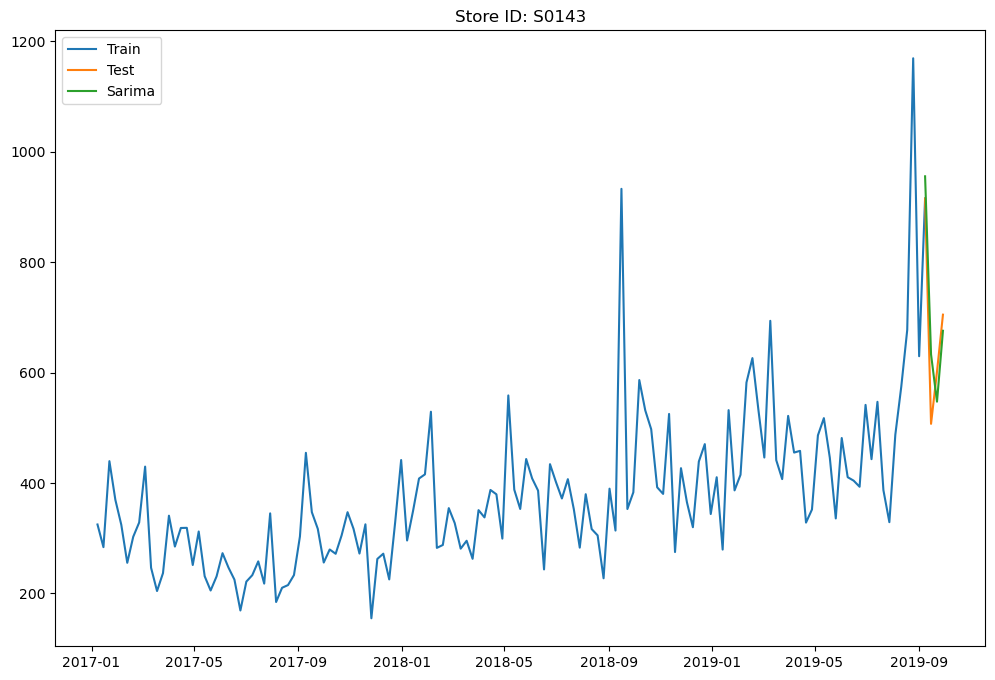

In [438]:
store_ids = ["S0002", "S0003","S0136", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(df_train[df_train["store_id"] == store_id].loc[:, "revenue"], label='Train')
    plt.plot(df_test_sarima[df_test_sarima["store_id"] == store_id].loc[:, "revenue"], label='Test')
    plt.plot(df_test_sarima[df_test_sarima["store_id"] == store_id].loc[:, "Sarima"], label='Sarima')
    #plt.plot(avg[avg["store_id"] == store_id].loc[:, "avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [274]:
rmse_revenue_sarima = sqrt(mean_squared_error(df_test_sarima["Sarima"], df_test_sarima["revenue"]))
rmse_revenue_sarima

1169.6142472268145

In [2]:
import pandas as pd
from pmdarima import auto_arima

prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []
models = {}

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store to find the best parameters
    model = auto_arima(df_train_store["revenue"], 
                       start_p=1, 
                       start_q=1, 
                       test='kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=52,  # is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    # Save the model for the specific store
    models[store_id] = model
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(
        model.predict(n_periods=len(df_test_store)),
        columns=["predicted_revenue"]
    )
    prediction_store["store_id"] = store_id
    prediction_store["date"] = df_test_store["date"].values
    
    # Append the predictions to the prediction DataFrame
    prediction = prediction.append(prediction_store, ignore_index=True)
    
# Forecast revenue for the upcoming 5 weeks
for store_id in store_ids:
    # Check if the store ID is not in insufficient_data_stores and a model exists for it
    if store_id not in insufficient_data_stores and store_id in models:
        # Retrieve the corresponding model from the models dictionary
        model = models[store_id]
        
        # Get the last date in the prediction DataFrame for the specific store
        last_date = prediction[prediction["store_id"] == store_id]["date"].max()
        
        # Forecast revenue for the upcoming 5 weeks
        forecast_dates = pd.date_range(start=last_date + pd.DateOffset(7), periods=5, freq="7D")
        forecast = pd.DataFrame(
            model.predict(n_periods=5),
            columns=["predicted_revenue"]
        )
        forecast["store_id"] = store_id
        forecast["date"] = forecast_dates
        
        # Append the forecasted revenue to the prediction DataFrame
        prediction = prediction.append(forecast, ignore_index=True)
    else:
        print(f"No model found for Store ID: {store_id}")

# Display the predictions for all weeks
print(prediction)

NameError: name 'train' is not defined

In [ ]:
import pandas as pd
from pmdarima import auto_arima

prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []
models = {}
best_params = {}

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store to find the best parameters
    model = auto_arima(df_train_store["revenue"], 
                       start_p=1, 
                       start_q=1, 
                       test='kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=52,  # is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    # Save the model for the specific store
    models[store_id] = model
    
    # Store the best parameters for the specific store
    best_params[store_id] = model.get_params()
    
    # Get the predicted values for the specific store
    prediction_store = pd.DataFrame(
        model.predict(n_periods=len(df_test_store)),
        columns=["predicted_revenue"]
    )
    prediction_store["store_id"] = store_id
    prediction_store["date"] = df_test_store.index
    
    # Append the predictions to the prediction DataFrame
    prediction = prediction.append(prediction_store, ignore_index=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=5.08 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1620.241, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1605.522, Time=0.86 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=4.35 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1632.841, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1611.956, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=14.35 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=5.93 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=16.28 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=1616.655, Time=0.68 sec
 ARIMA(2,0,0)(1,1,0)[52] intercept   : AIC=1606.880, Time=1.46 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=1602.735, Time=3.41 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=1613.723, Time=0.24 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : AIC=1595

In [ ]:
models

In [ ]:
# Forecast revenue for the upcoming 5 weeks
for store_id in store_ids:
    # Check if the store ID is not in insufficient_data_stores and a model exists for it
    if store_id not in insufficient_data_stores and store_id in models:
        # Retrieve the corresponding model from the models dictionary
        model = models[store_id]
        
        # Get the last date in the prediction DataFrame for the specific store
        last_date = prediction[prediction["store_id"] == store_id]["date"].max()
        
        # Forecast revenue for the upcoming 5 weeks
        forecast_dates = pd.date_range(start=last_date + pd.DateOffset(7), periods=5, freq="7D")
        forecast = pd.DataFrame(
            model.predict(n_periods=5),
            columns=["predicted_revenue"]
        )
        forecast["store_id"] = store_id
        forecast["date"] = forecast_dates
        
        # Append the forecasted revenue to the prediction DataFrame
        prediction = prediction.append(forecast, ignore_index=True)
    else:
        print(f"No model found for Store ID: {store_id}")

# Display the predictions for all weeks
print(prediction)

# Display the best parameters for each store
for store_id, params in best_params.items():
    print(f"Store ID: {store_id}, Best Parameters: {params}")

In [444]:
sales_grouped

,store_id,date,sales,revenue
0,S0002,2017-01-08,750.232,1813.24
1,S0002,2017-01-15,871.530,1896.91
2,S0002,2017-01-22,1069.555,7404.16
3,S0002,2017-01-29,910.255,2078.39
4,S0002,2017-02-05,732.754,1745.47
...,...,...,...,...
8605,S0143,2019-10-06,18.000,80.82
8606,S0143,2019-10-13,0.000,0.00
8607,S0143,2019-10-20,0.000,0.00
8608,S0143,2019-10-27,0.000,0.00


In [443]:
prediction_future_sarima = prediction_future.copy()
future_sarima = df_test[~df_test['store_id'].isin(insufficient_data_stores)]
future_sarima["Future"] = prediction_future_sarima["predicted_revenue"].values
future_sarima

ValueError: Length of values (488) does not match length of index (215)

In [427]:
# Apply auto_arima for each store ID with seasonal component -- SARIMA 

# Create an empty DataFrame to store the predictions
prediction = pd.DataFrame(columns=['predicted_revenue', 'store_id'])
df_train = pd.DataFrame(columns=train.columns)
df_test = pd.DataFrame(columns=test.columns)
insufficient_data_stores = []
prediction_future = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    df_train_store = train[train['store_id'] == store_id]
    df_test_store = test[test['store_id'] == store_id]
    
    # Append the filtered data for the specific store to df_test
    df_train = df_train.append(df_train_store)
    df_test = df_test.append(df_test_store)
    
    # Check if the number of observations is sufficient for decomposition
    if len(df_store) < 2 * 52:
        print(f"Not enough observations for Store ID: {store_id}")
        insufficient_data_stores.append(store_id)
        continue
    
    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       start_p=1, 
                       start_q=1, 
                       test = 'kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=52, # is the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, error_action='ignore', 
                       suppress_warnings=True, stepwise=True, random_state=20)

    # Train the model 
    model.fit(df_train_store["revenue"])
    
    #Get the predicted values for the specific store
    prediction_store = pd.DataFrame(model.predict(n_periods = len(df_test_store)), columns = ["predicted_revenue"])
    prediction_store["store_id"] = store_id
    prediction_store = prediction_store.set_index(df_test_store.index)
    prediction = prediction.append(prediction_store)
    
    # Generate predictions for the next 4 weeks
    next_4_weeks = pd.date_range(start=df_store.index[-1] + pd.DateOffset(weeks=1), periods=4, freq='W')
    exog_future = pd.DataFrame(index=next_4_weeks, columns=exog_store.columns)
    exog_future.fillna(0, inplace=True)  # Fill NaN values with appropriate values for exogenous variables
    prediction_future_store = pd.DataFrame(
        model.predict(n_periods=len(next_4_weeks), exogenous=exog_future),
        columns=["predicted_revenue"]
    )
    prediction_future_store["store_id"] = store_id
    prediction_future_store["date"] = next_4_weeks
    prediction_future = prediction_future.append(prediction_future_store)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=4.30 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1777.070, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1757.101, Time=0.84 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1783.733, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1764.018, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=9.11 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=4.47 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=11.69 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=1769.581, Time=1.36 sec
 ARIMA(2,0,0)(1,1,0)[52] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=1756.390, Time=1.24 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=1766.000, Time=0.20 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : AIC=1747.662, 

In [431]:
model
# df_test_sarimax = test[~test['store_id'].isin(insufficient_data_stores)]
# df_test_sarimax["Sarimax"] = prediction_sarimax["predicted_revenue"].values
# df_test_sarimax

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True)

In [302]:
df_test["arima"] = df_test_arima["arima_revenue"]
df_test["difference"] = df_test["arima"] - df_test["arimax_revenue"]
df_test[df_test["difference"] != 0]

,store_id,sales,revenue,promo_discount_2,is_holiday,month,arimax_revenue,arima,difference


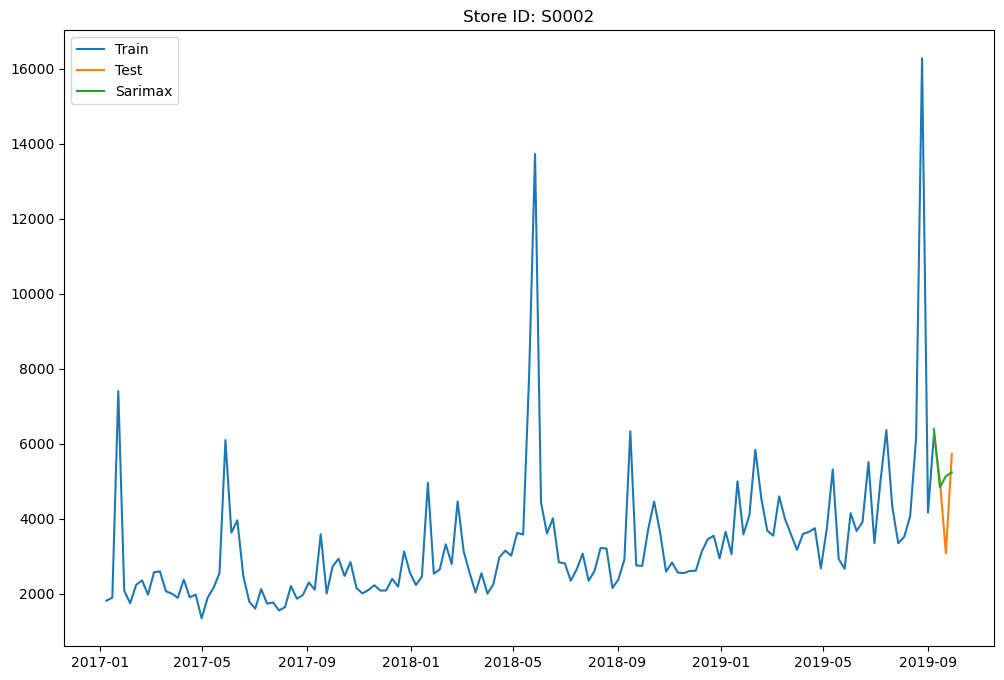

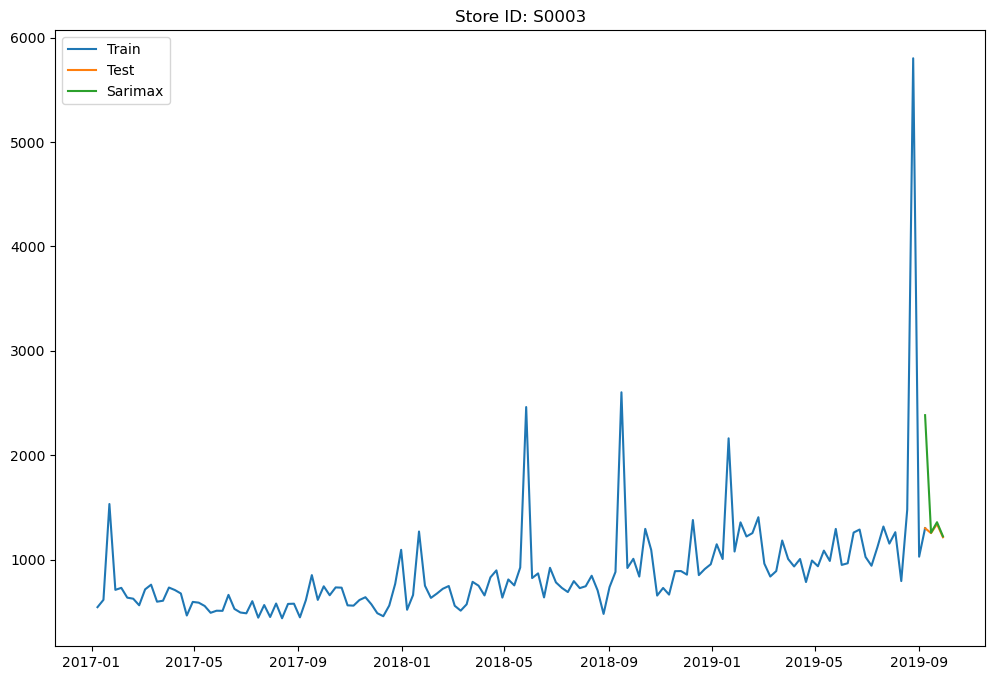

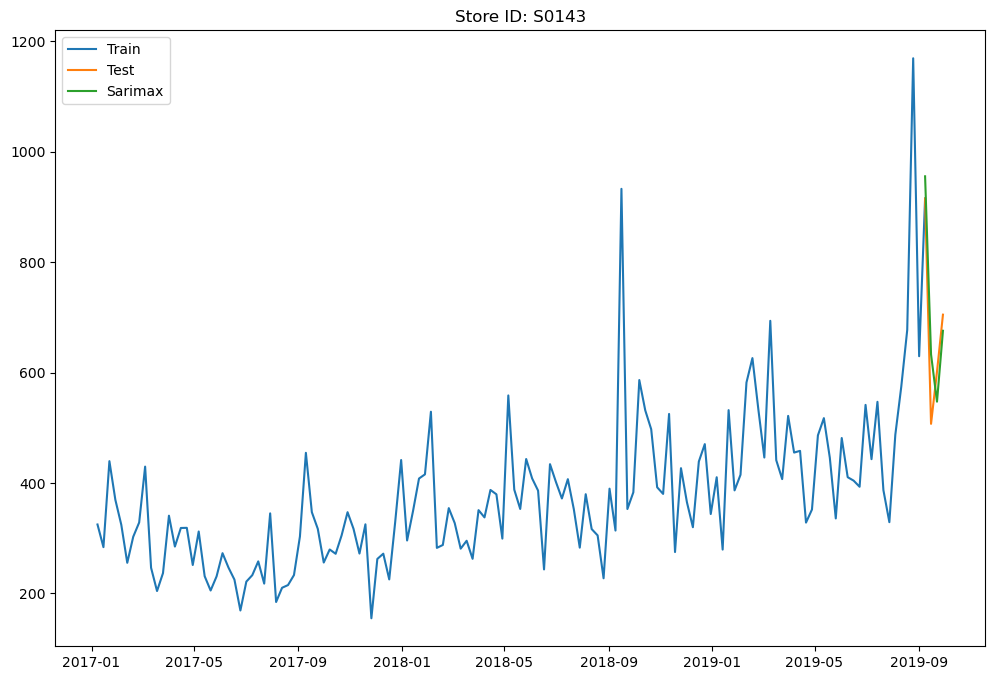

In [146]:
store_ids = ["S0002", "S0003", "S0143"]

for store_id in store_ids:
    plt.figure(figsize=(12, 8))
    plt.plot(train[train["store_id"] == store_id].loc[:, "revenue"], label='Train')
    plt.plot(df_test_sarimax[df_test_sarimax["store_id"] == store_id].loc[:, "revenue"], label='Test')
    plt.plot(df_test_sarimax[df_test_sarimax["store_id"] == store_id].loc[:, "Sarimax"], label='Sarimax')
    #plt.plot(avg[avg["store_id"] == store_id].loc[:, "avg_forecast_sales"], label='Average Forecast')
    plt.title(f"Store ID: {store_id}")
    plt.legend(loc='best')
    plt.show()

In [275]:
rmse_revenue_sarimax = sqrt(mean_squared_error(df_test_sarimax["Sarimax"], df_test_sarimax["revenue"]))
rmse_revenue_sarimax

1169.6142472268145

# Escolha do melhor modelo através da análise do RMSE

In [375]:
#df_test.set_index("index", inplace = True)
df_test = df_test.drop("level_0", axis = 1)

df_test

,store_id,sales,revenue,promo_discount_2,is_holiday,month,arimax_revenue,arima,difference,sarima
index,,,,,,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0,9,4416.007678,4416.007678,0.0,6389.588606
2019-09-15,S0002,656.00,5007.57,1.0,0,9,4012.659636,4012.659636,0.0,6389.588606
2019-09-22,S0002,525.00,3074.56,1.0,0,9,3670.729063,3670.729063,0.0,6389.588606
2019-09-29,S0002,656.16,5728.25,1.0,0,9,3509.175590,3509.175590,0.0,6389.588606
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2291.120259,2291.120259,0.0,2384.743350
...,...,...,...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,1377.595301,1377.595301,0.0,2318.118332
2019-09-08,S0143,104.00,915.27,1.0,0,9,664.531859,664.531859,0.0,955.522650
2019-09-15,S0143,63.00,507.08,1.0,0,9,685.709388,685.709388,0.0,955.522650


In [379]:
#df_test_sarima.set_index("index", inplace = True)
#df_test_sarima = df_test_sarima.drop("level_0", axis = 1)
df_test_sarima

,store_id,sales,revenue,promo_discount_2,is_holiday,month,Sarima
index,,,,,,,
2019-09-08,S0002,598.00,6267.91,1.0,0,9,6389.588606
2019-09-15,S0002,656.00,5007.57,1.0,0,9,4839.284421
2019-09-22,S0002,525.00,3074.56,1.0,0,9,5133.821161
2019-09-29,S0002,656.16,5728.25,1.0,0,9,5238.150516
2019-09-08,S0003,227.00,1302.61,1.0,0,9,2384.743350
...,...,...,...,...,...,...,...
2019-09-29,S0142,302.00,1866.41,1.0,0,9,2037.519292
2019-09-08,S0143,104.00,915.27,1.0,0,9,955.522650
2019-09-15,S0143,63.00,507.08,1.0,0,9,632.808537


In [383]:
df_test['sarima'] = df_test['store_id'].map(df_test_sarima.set_index('store_id')['Sarima']).fillna(0)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [273]:
model = ["Média", "Arima", "Arimax", "Sarima", "Sarimax"]

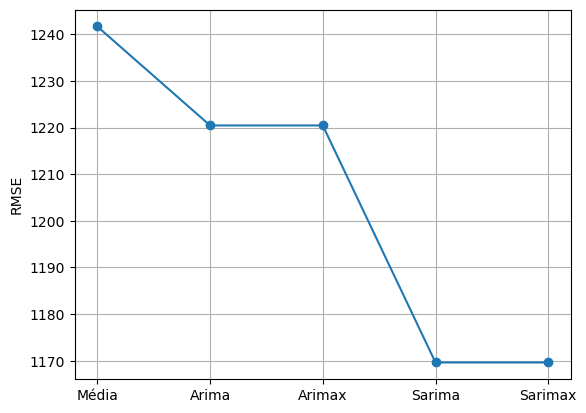

In [293]:
RMSE = [rmse_revenue_avg, rmse_revenue_arima, rmse_revenue_arimax, rmse_revenue_sarima, rmse_revenue_sarimax]
RMSE = pd.DataFrame(RMSE, columns = ["RMSE"], index = model)
plt.plot(RMSE, marker='o')
plt.ylabel("RMSE")
plt.grid();
#plt.bar(RMSE.index, RMSE["RMSE"])

After analyzing all RMSE, the best model is the SARIMA (lowest RMSE)

In [385]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima

# Assuming you have the necessary data and trained model already

# Get the unique store IDs from the test DataFrame
store_ids = test["store_id"].unique()

# Create an empty DataFrame to store the predictions
prediction_future = pd.DataFrame(columns=['predicted_revenue', 'store_id', 'date'])

for store_id in store_ids:
    # Filter the data for the specific store ID
    df_store = sales_promo[sales_promo['store_id'] == store_id]
    exog_store = sales_promo[sales_promo['store_id'] == store_id][['promo_discount_2', 'is_holiday', 'month']]
    
    # Apply auto_arima for the specific store
    model = auto_arima(df_store["revenue"], 
                       exogenous=exog_store,
                       start_p=1, 
                       start_q=1, 
                       test='kpss',
                       max_p=5, 
                       max_q=5, 
                       d=None, 
                       seasonal=True,
                       m=52,  # the frequency of the cycle 
                       start_P=0,  
                       max_P=5, 
                       max_D=5, 
                       max_Q=5, 
                       D=1, 
                       trace=True, 
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True, 
                       random_state=20)

    # Train the model 
    model.fit(df_store["revenue"])
    
    # Generate predictions for the next 4 weeks
    next_4_weeks = pd.date_range(start=df_store.index[-1] + pd.DateOffset(weeks=1), periods=4, freq='W')
    exog_future = exog_store.loc[next_4_weeks, :]
    prediction_future_store = pd.DataFrame(
        model.predict(n_periods=len(next_4_weeks), exogenous=exog_future),
        columns=["predicted_revenue"])
    prediction_future_store["store_id"] = store_id
    prediction_future_store["date"] = next_4_weeks
    prediction_future = prediction_future.append(prediction_future_store)

# Display the predictions for the next 4 weeks
print(prediction_future)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=5.45 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1777.070, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1757.101, Time=1.12 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1783.733, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1764.018, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=12.71 sec


KeyboardInterrupt: 

In [189]:
sales_promo_v2 = sales_promo["2017-01-08":"2019-09-29"]
sales_promo_v2

,store_id,sales,revenue,promo_discount_2,is_holiday,month
date,,,,,,
2017-01-08,S0002,750.232,1813.24,0.0,0,1
2017-01-15,S0002,871.530,1896.91,0.0,0,1
2017-01-22,S0002,1069.555,7404.16,0.0,0,1
2017-01-29,S0002,910.255,2078.39,0.0,0,1
2017-02-05,S0002,732.754,1745.47,0.0,0,2
...,...,...,...,...,...,...
2019-09-01,S0143,82.000,629.58,1.0,1,9
2019-09-08,S0143,104.000,915.27,1.0,0,9
2019-09-15,S0143,63.000,507.08,1.0,0,9


In [258]:
from sklearn.preprocessing import MinMaxScaler

store_id_RNN = "S0143"
scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
revenue = sales_promo_v2[sales_promo_v2["store_id"] == store_id_RNN].revenue.values.reshape(-1, 1)
scaled_revenue = scaler.fit_transform(revenue)
scaled_revenue

array([[0.16748477],
       [0.1270428 ],
       [0.2805705 ],
       [0.21159343],
       [0.16681452],
       [0.09903996],
       [0.14552408],
       [0.17108246],
       [0.2708321 ],
       [0.09012952],
       [0.0486723 ],
       [0.08062767],
       [0.18318647],
       [0.12805804],
       [0.1612652 ],
       [0.16150176],
       [0.09517614],
       [0.15494707],
       [0.07512764],
       [0.04960869],
       [0.07478266],
       [0.11623987],
       [0.09052378],
       [0.06902636],
       [0.01388807],
       [0.06548781],
       [0.07699056],
       [0.1016027 ],
       [0.06188026],
       [0.18735585],
       [0.0290575 ],
       [0.05445818],
       [0.05928795],
       [0.07717783],
       [0.14602677],
       [0.29547381],
       [0.18952432],
       [0.15972756],
       [0.09956236],
       [0.12283399],
       [0.11517535],
       [0.14801782],
       [0.18943561],
       [0.15979656],
       [0.1155499 ],
       [0.16777062],
       [0.        ],
       [0.105

In [259]:
seq_len = 60

def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_revenue, seq_len, train_frac=0.9)

In [260]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [261]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

In [262]:
# build a 3-layer LSTM RNN
model = keras.Sequential()
model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, x_train.shape[-1])))
model.add(Dropout(rate=dropout))

In [263]:
# Bidirectional allows for training of sequence data forwards and backwards
model.add(Bidirectional(LSTM((window_size * 2), return_sequences=True))) 
model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False))) 

In [264]:
model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

In [265]:
# building the model with an input layer, 2 more bidirectional LSTM layers, and an output layer
# “Bidirectional” allows for training of the data sequence forwards and backwards.

In [270]:
batch_size = 16

model.compile(
    loss='mean_squared_error',
    optimizer='adam')

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 11s 967ms/step - loss: 0.0122 - val_loss: 0.0245
Epoch 2/50
4/4 [==============================] - 2s 543ms/step - loss: 0.0122 - val_loss: 0.0065
Epoch 3/50
4/4 [==============================] - 2s 547ms/step - loss: 0.0103 - val_loss: 0.0123
Epoch 4/50
4/4 [==============================] - 2s 551ms/step - loss: 0.0104 - val_loss: 0.0120
Epoch 5/50
4/4 [==============================] - 2s 547ms/step - loss: 0.0101 - val_loss: 0.0106
Epoch 6/50
4/4 [==============================] - 2s 544ms/step - loss: 0.0101 - val_loss: 0.0145
Epoch 7/50
4/4 [==============================] - 2s 547ms/step - loss: 0.0100 - val_loss: 0.0104
Epoch 8/50
4/4 [==============================] - 2s 544ms/step - loss: 0.0099 - val_loss: 0.0141
Epoch 9/50
4/4 [==============================] - 2s 572ms/step - loss: 0.0095 - val_loss: 0.0096
Epoch 10/50
4/4 [==============================] - 2s 564ms/step - loss: 0.0092 - val_loss: 0.0131
Epoch 11/50
4/4 [=

1/1 [==============================] - 1s 1s/step


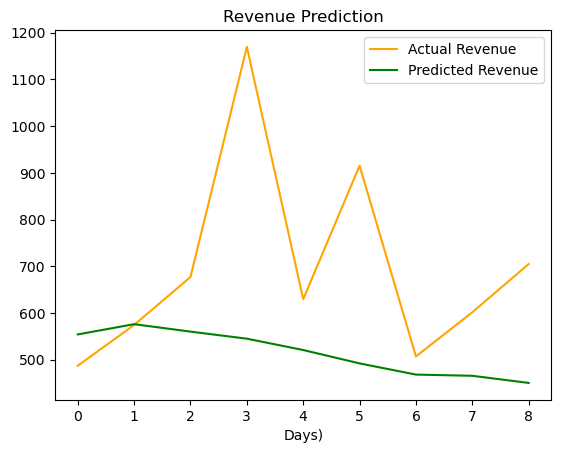

In [271]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Revenue', color='orange')
plt.plot(y_pred_orig, label='Predicted Revenue', color='green')
 
plt.title('Revenue Prediction')
plt.xlabel('Days)')
plt.legend(loc='best')

plt.show();

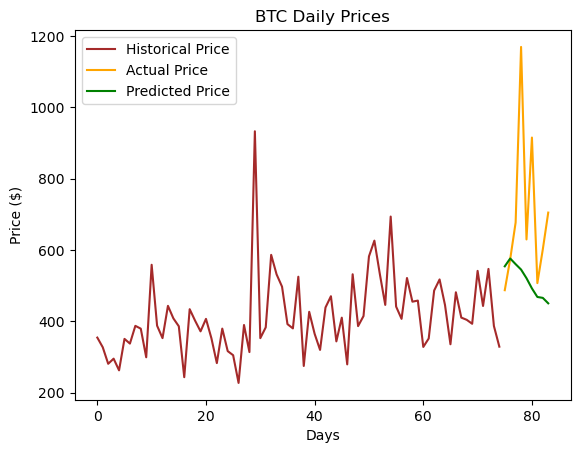

In [272]:
# plot for whole range of data
plt.plot(np.arange(0, len(y_train)), scaler.inverse_transform(y_train), color='brown', label='Historical Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, color='orange', label='Actual Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred_orig)), y_pred_orig, color='green', label='Predicted Price')

plt.title('BTC Daily Prices')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show();